<a href="https://colab.research.google.com/github/n3d1m/SYDE-675-Final-Project/blob/main/SYDE_675_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install autogluon

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from autogluon.tabular import TabularDataset, TabularPredictor
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

In [3]:
df_italian = pd.read_csv('./italian_dataset.csv')
df_italian.drop('voiceID', inplace = True, axis = 1)
df_italian['label'].value_counts()
df_italian

,meanF0Hz,maxF0Hz,minF0Hz,localJitter,localabsoluteJitter,rapJitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,...,mfcc_feature4,mfcc_feature5,mfcc_feature6,mfcc_feature7,mfcc_feature8,mfcc_feature9,mfcc_feature10,mfcc_feature11,mfcc_feature12,label
0,157.612529,223.832609,68.338016,0.007651,0.000048,0.003751,0.011254,0.070765,0.652130,0.031894,...,-49.251208,18.796834,48.564395,-30.457043,-20.377765,-27.540473,-12.749354,15.989287,-22.081665,0
1,125.702970,137.627940,119.652425,0.006869,0.000055,0.003822,0.011466,0.084413,0.889340,0.043123,...,-78.149194,30.988700,24.493318,-20.969052,-23.542736,-1.080957,-16.940854,-6.063577,3.062718,0
2,162.415428,305.279785,77.756231,0.003867,0.000024,0.002188,0.006563,0.037094,0.346041,0.019231,...,-34.889488,-4.165275,24.972565,-18.598430,-47.906418,22.721959,-4.890056,-22.565616,-13.399373,0
3,209.128449,232.806003,94.472994,0.013749,0.000066,0.007749,0.023247,0.195157,1.698813,0.107110,...,-10.728669,19.331924,-14.138539,-37.134512,-8.397403,-5.019446,-13.747188,-19.980643,-29.546068,0
4,196.447580,276.977361,88.749203,0.005496,0.000028,0.003173,0.009518,0.049434,0.547189,0.025140,...,-63.792530,51.559922,-9.509762,-77.163489,0.168059,-44.382173,-5.100174,0.789079,1.989662,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,168.440057,183.919696,163.333959,0.003689,0.000022,0.001965,0.005895,0.021701,0.187917,0.011360,...,-6.656341,-49.662973,38.942872,-6.729492,-54.071944,41.137812,17.744590,-28.387798,-45.300394,1
491,145.069239,150.066907,142.947578,0.001483,0.000010,0.000743,0.002228,0.011682,0.099998,0.006493,...,-86.002240,-75.221067,30.624139,4.003962,-46.894581,12.383476,-19.300760,-22.765397,-3.801184,1
492,148.338018,151.767444,144.727089,0.004897,0.000033,0.002693,0.008078,0.022827,0.184050,0.012515,...,-73.214892,-81.632712,69.243527,-13.565905,-12.181925,-28.593571,-24.004176,18.235456,-25.750860,1
493,210.594832,218.339095,187.229231,0.001785,0.000008,0.000885,0.002655,0.009076,0.083859,0.002632,...,5.240265,-50.237003,-62.681410,-59.493038,-0.776497,35.432915,-15.978271,0.503871,-54.887495,1


In [4]:
df_MDVR = pd.read_csv('./MDVR_all_features_chunks.csv')
df_MDVR.drop(['voiceID', 'label_x'], inplace = True, axis = 1)
df_MDVR.rename(columns={'label_y':'label'}, inplace=True)
df_MDVR['label'].value_counts()
df_MDVR = df_MDVR.dropna() #removing all rows with NA values
df_MDVR

,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,localShimmer,localdbShimmer,apq3Shimmer,...,mfcc_feature4,mfcc_feature5,mfcc_feature6,mfcc_feature7,mfcc_feature8,mfcc_feature9,mfcc_feature10,mfcc_feature11,mfcc_feature12,label
0,231.250953,45.480073,16.525302,0.027821,0.000121,0.011726,0.011947,0.085180,0.922601,0.028993,...,24.552747,-20.110619,-94.736717,-55.245548,-2.910492,-22.578827,-8.833281,4.481475,-7.786104,0
1,201.477299,14.236377,18.961886,0.014327,0.000071,0.006781,0.007266,0.075751,0.843053,0.021091,...,55.259625,-9.692891,-87.940073,-53.553243,-15.094735,-5.031696,1.086642,12.303356,-6.256570,0
2,209.285317,29.051820,12.840174,0.029609,0.000143,0.013380,0.009806,0.078756,0.813759,0.028769,...,50.166589,27.302583,-78.536637,-88.946175,-17.807079,-26.052948,4.212388,15.374215,-22.268039,0
3,221.819604,31.556270,16.250999,0.027461,0.000123,0.012908,0.015317,0.088893,0.941172,0.033405,...,34.791814,-3.472786,-99.235397,-67.622613,0.790294,-12.970583,2.264660,1.247783,-29.259117,0
4,199.675876,6.519508,14.700531,0.026505,0.000134,0.014263,0.016973,0.078197,0.684674,0.030303,...,-1.658086,-28.638360,-119.038394,-29.546933,35.435261,-17.023488,-14.687500,16.904188,9.033225,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,195.347573,3.898871,16.031184,0.015449,0.000079,0.007649,0.009837,0.105253,1.159898,0.030603,...,-19.489413,36.202501,-12.024058,-31.619932,-27.050083,0.008420,-2.687716,-36.327416,-7.040984,1
812,202.670234,19.536584,16.369083,0.015260,0.000076,0.007204,0.006306,0.054645,0.518385,0.020535,...,7.578952,35.383236,-21.173209,-39.841536,-47.107387,1.869901,10.608157,-5.297793,-22.543747,1
813,186.407006,14.370029,15.624512,0.021293,0.000114,0.011290,0.010155,0.066981,0.627914,0.029828,...,40.402198,39.211555,-33.991202,-31.252842,-36.273257,-5.828548,19.337134,-11.712576,-29.476929,1
814,192.683946,15.802679,14.853809,0.019649,0.000102,0.009636,0.008887,0.063512,0.622949,0.024778,...,12.883081,28.696040,-27.721696,-25.856546,-38.773029,7.435858,17.053259,-9.497502,-19.095361,1


In [5]:
#Seperating Independent and Dependent variables

df_italian_X = df_italian.iloc[:, :-1]
df_italian_Y = df_italian.iloc[:,-1]

df_MDVR_X = df_MDVR.iloc[:, :-1]
df_MDVR_Y = df_MDVR.iloc[:,-1]



In [6]:
# apply SelectKBest class to extract top 10 best features for italian dataset

bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(df_italian_X,df_italian_Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_italian_X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

          Features       Score
14   mfcc_feature1  126.044186
8   localdbShimmer  101.435850
7     localShimmer   97.971930
10     apq5Shimmer   89.594248
17   mfcc_feature4   88.888963
9      apq3Shimmer   81.745973
11      ddaShimmer   81.745973
12             hnr   46.485138
18   mfcc_feature5   29.400946
15   mfcc_feature2   27.181623


In [7]:
# apply SelectKBest class to extract top 10 best features for MDVR dataset

bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(df_MDVR_X,df_MDVR_Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_MDVR_X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

               Features       Score
0              meanF0Hz  110.780807
13        mfcc_feature2   90.612475
4   localabsoluteJitter   83.714200
17        mfcc_feature6   63.407203
14        mfcc_feature3   58.551949
15        mfcc_feature4   58.407045
1             stdevF0Hz   35.737933
22       mfcc_feature11   20.256843
16        mfcc_feature5   17.623682
18        mfcc_feature7   13.519054


In [8]:
italian_acoustic_feature_names = ['meanF0Hz',
 'maxF0Hz',
 'minF0Hz',
 'localJitter',
 'localabsoluteJitter',
 'rapJitter',
 'ddpJitter',
 'localShimmer',
 'localdbShimmer',
 'apq3Shimmer',
 'apq5Shimmer',
 'ddaShimmer',
 'hnr']

italian_selected_feature_names = ['mfcc_feature1', 'localdbShimmer', 'localShimmer', 'apq5Shimmer', 'mfcc_feature4', 'apq3Shimmer',
                                  'ddaShimmer', 'hnr', 'mfcc_feature5', 'mfcc_feature2']

mdvr_acoustic_feature_names = ['meanF0Hz', 'stdevF0Hz', 'HNR', 'localJitter', 'localabsoluteJitter',
       'rapJitter', 'ppq5Jitter', 'localShimmer', 'localdbShimmer',
       'apq3Shimmer', 'apq5Shimmer']

mdvr_selected_feature_names = ['meanF0Hz',
 'mfcc_feature2',
 'localabsoluteJitter',
 'mfcc_feature6',
 'mfcc_feature3',
 'mfcc_feature4',
 'stdevF0Hz',
 'mfcc_feature11',
 'mfcc_feature5',
 'mfcc_feature7' ]


eval_metrics = ['accuracy', 'f1', 'precision', 'recall']



# Experiment 1: Italian Dataset - Acoustic Features Only


In [9]:
#Splitting the data into training and testing sets

italian_acoustic = df_italian_X[italian_acoustic_feature_names]

X_train, X_test, y_train, y_test = train_test_split(italian_acoustic, df_italian_Y, test_size = 0.3, random_state = 42)

# Scale
sc = MinMaxScaler()

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

X_train = pd.concat([X_train, y_train], axis=1, join="inner")
X_test = pd.concat([X_test, y_test], axis=1, join="inner")

X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))

In [10]:
#fitting models to training data

predictor = TabularPredictor(label=13, path=None ).fit(X_train, num_bag_folds=6, num_bag_sets=10)
predictor.leaderboard(data = X_train, extra_metrics=eval_metrics, extra_info=False)

No path specified. Models will be saved in: "AutogluonModels/ag-20220419_152309/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220419_152309/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    346
Train Data Columns: 13
Label Column: 13
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0.0, 1.0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11970.82 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memory)
	Inferring data type of each featu

                      model  score_test  accuracy        f1  precision    recall  score_val  pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     KNeighborsDist_BAG_L1    1.000000  1.000000  1.000000   1.000000  1.000000   0.783237        0.103551       0.102029    0.007264                 0.103551                0.102029           0.007264            1       True          2
1     ExtraTreesGini_BAG_L1    1.000000  1.000000  1.000000   1.000000  1.000000   0.867052        0.218906       0.162997    1.018283                 0.218906                0.162997           1.018283            1       True          8
2     ExtraTreesEntr_BAG_L1    1.000000  1.000000  1.000000   1.000000  1.000000   0.861272        0.221588       0.145473    0.873525                 0.221588                0.145473           0.873525            1       True          9
3   RandomForestEntr_BAG_L1    1.000000  1.00000

,model,score_test,accuracy,f1,precision,recall,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.783237,0.103551,0.102029,0.007264,0.103551,0.102029,0.007264,1,True,2
1,ExtraTreesGini_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.867052,0.218906,0.162997,1.018283,0.218906,0.162997,1.018283,1,True,8
2,ExtraTreesEntr_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.861272,0.221588,0.145473,0.873525,0.221588,0.145473,0.873525,1,True,9
3,RandomForestEntr_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.841040,0.222980,0.131989,0.840919,0.222980,0.131989,0.840919,1,True,6
4,RandomForestGini_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.841040,0.231486,0.134404,1.199201,0.231486,0.134404,1.199201,1,True,5
5,XGBoost_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.835260,0.644325,0.639488,120.396167,0.644325,0.639488,120.396167,1,True,11
6,LightGBMLarge_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.855491,1.274622,0.280088,167.554828,1.274622,0.280088,167.554828,1,True,13
7,LightGBM_BAG_L1,0.997110,0.997110,0.997416,0.994845,1.000000,0.846821,0.495512,0.333610,153.654029,0.495512,0.333610,153.654029,1,True,4
8,CatBoost_BAG_L1,0.982659,0.982659,0.984615,0.974619,0.994819,0.861272,0.184606,0.244261,259.719389,0.184606,0.244261,259.719389,1,True,7
9,WeightedEnsemble_L2,0.953757,0.953757,0.959184,0.944724,0.974093,0.916185,3.638811,3.588280,607.074219,0.004663,0.001868,0.836508,2,True,14


In [11]:
X_test = X_test.iloc[:, :-1]

Evaluation: accuracy on test data: 0.8657718120805369
Evaluations on test data:
{
    "accuracy": 0.8657718120805369,
    "balanced_accuracy": 0.8643975245722606,
    "mcc": 0.7287950491445213,
    "f1": 0.8780487804878049,
    "precision": 0.8780487804878049,
    "recall": 0.8780487804878049
}


              precision    recall  f1-score   support

           0       0.85      0.85      0.85        67
           1       0.88      0.88      0.88        82

    accuracy                           0.87       149
   macro avg       0.86      0.86      0.86       149
weighted avg       0.87      0.87      0.87       149



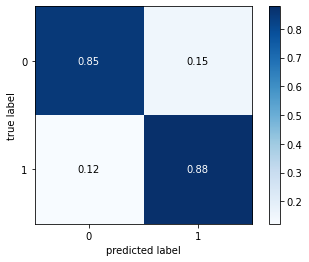

In [12]:
#Predictions on testing data

y_pred = predictor.predict(X_test)
perf = predictor.evaluate_predictions(y_true=y_test.squeeze(), y_pred=y_pred, auxiliary_metrics=True)
print(classification_report(y_test.squeeze(), y_pred))

cm = confusion_matrix(y_test.squeeze(), y_pred)

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   show_absolute = False,
                                   show_normed = True,
                                   colorbar = True)

plt.show()

# Experiment 2: Italian Dataset - All Features

In [13]:
#Splitting the data into training and testing sets

italian_all = df_italian_X #original dataset includes all features

X_train, X_test, y_train, y_test = train_test_split(italian_all, df_italian_Y, test_size = 0.3, random_state = 42)

# Scale
sc = MinMaxScaler()

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

X_train = pd.concat([X_train, y_train], axis=1, join="inner")
X_test = pd.concat([X_test, y_test], axis=1, join="inner")

X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))


In [14]:
#fitting models to training data

predictor = TabularPredictor(label=26, path=None).fit(X_train, num_bag_folds=6, num_bag_sets=10)
predictor.leaderboard(data = X_train, extra_metrics=eval_metrics, extra_info=False)

No path specified. Models will be saved in: "AutogluonModels/ag-20220419_154547/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220419_154547/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    346
Train Data Columns: 26
Label Column: 26
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0.0, 1.0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11555.78 MB
	Train Data (Original)  Memory Usage: 0.07 MB (0.0% of available memory)
	Inferring data type of each featu

                      model  score_test  accuracy        f1  precision    recall  score_val  pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     KNeighborsDist_BAG_L1    1.000000  1.000000  1.000000   1.000000  1.000000   0.881503        0.106383       0.108251    0.006225                 0.106383                0.108251           0.006225            1       True          2
1           CatBoost_BAG_L1    1.000000  1.000000  1.000000   1.000000  1.000000   0.947977        0.164594       0.259328  355.327772                 0.164594                0.259328         355.327772            1       True          7
2   RandomForestGini_BAG_L1    1.000000  1.000000  1.000000   1.000000  1.000000   0.924855        0.215868       0.133525    0.965179                 0.215868                0.133525           0.965179            1       True          5
3   RandomForestEntr_BAG_L1    1.000000  1.00000

,model,score_test,accuracy,f1,precision,recall,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.881503,0.106383,0.108251,0.006225,0.106383,0.108251,0.006225,1,True,2
1,CatBoost_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.947977,0.164594,0.259328,355.327772,0.164594,0.259328,355.327772,1,True,7
2,RandomForestGini_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.924855,0.215868,0.133525,0.965179,0.215868,0.133525,0.965179,1,True,5
3,RandomForestEntr_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.942197,0.219755,0.138036,0.955113,0.219755,0.138036,0.955113,1,True,6
4,ExtraTreesGini_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.956647,0.225495,0.131840,0.913341,0.225495,0.131840,0.913341,1,True,8
5,ExtraTreesEntr_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.953757,0.225579,0.132499,0.777158,0.225579,0.132499,0.777158,1,True,9
6,LightGBMXT_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.976879,0.687772,0.337908,144.523749,0.687772,0.337908,144.523749,1,True,3
7,XGBoost_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.939306,0.693619,0.604196,133.544386,0.693619,0.604196,133.544386,1,True,11
8,LightGBM_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.959538,0.695351,0.309213,147.840965,0.695351,0.309213,147.840965,1,True,4
9,LightGBMLarge_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.950867,1.118849,0.366967,177.316383,1.118849,0.366967,177.316383,1,True,13


In [15]:
X_test = X_test.iloc[:, :-1]

Evaluation: accuracy on test data: 0.9932885906040269
Evaluations on test data:
{
    "accuracy": 0.9932885906040269,
    "balanced_accuracy": 0.9925373134328358,
    "mcc": 0.9865121681293597,
    "f1": 0.993939393939394,
    "precision": 0.9879518072289156,
    "recall": 1.0
}


              precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.99      1.00      0.99        82

    accuracy                           0.99       149
   macro avg       0.99      0.99      0.99       149
weighted avg       0.99      0.99      0.99       149



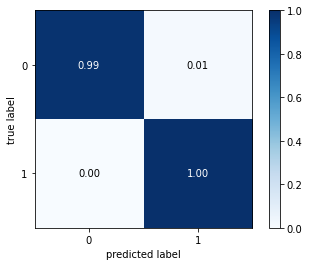

In [16]:
#Predictions on testing data

y_pred = predictor.predict(X_test)
perf = predictor.evaluate_predictions(y_true=y_test.squeeze(), y_pred=y_pred, auxiliary_metrics=True)
print(classification_report(y_test.squeeze(), y_pred))

cm = confusion_matrix(y_test.squeeze(), y_pred)

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   show_absolute = False,
                                   show_normed = True,
                                   colorbar = True)

plt.show()

# Experiment 3: Italian Dataset - Custom Features


In [17]:
#Splitting the data into training and testing sets

italian_custom = df_italian_X[italian_selected_feature_names]

X_train, X_test, y_train, y_test = train_test_split(italian_custom, df_italian_Y, test_size = 0.3, random_state = 42)

# Scale
sc = MinMaxScaler()

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

X_train = pd.concat([X_train, y_train], axis=1, join="inner")
X_test = pd.concat([X_test, y_test], axis=1, join="inner")

X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))


In [18]:
#fitting models to training data

predictor = TabularPredictor(label=10, path=None).fit(X_train, num_bag_folds=6, num_bag_sets=10)
predictor.leaderboard(data = X_train, extra_metrics=eval_metrics, extra_info=False)

No path specified. Models will be saved in: "AutogluonModels/ag-20220419_160959/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220419_160959/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    346
Train Data Columns: 10
Label Column: 10
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0.0, 1.0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11553.02 MB
	Train Data (Original)  Memory Usage: 0.03 MB (0.0% of available memory)
	Inferring data type of each featu

                      model  score_test  accuracy        f1  precision    recall  score_val  pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     KNeighborsDist_BAG_L1    1.000000  1.000000  1.000000   1.000000  1.000000   0.884393        0.103253       0.105160    0.006383                 0.103253                0.105160           0.006383            1       True          2
1   RandomForestGini_BAG_L1    1.000000  1.000000  1.000000   1.000000  1.000000   0.887283        0.128978       0.127429    0.925152                 0.128978                0.127429           0.925152            1       True          5
2   RandomForestEntr_BAG_L1    1.000000  1.000000  1.000000   1.000000  1.000000   0.893064        0.223867       0.126028    0.844300                 0.223867                0.126028           0.844300            1       True          6
3     ExtraTreesEntr_BAG_L1    1.000000  1.00000

,model,score_test,accuracy,f1,precision,recall,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.884393,0.103253,0.105160,0.006383,0.103253,0.105160,0.006383,1,True,2
1,RandomForestGini_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.887283,0.128978,0.127429,0.925152,0.128978,0.127429,0.925152,1,True,5
2,RandomForestEntr_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.893064,0.223867,0.126028,0.844300,0.223867,0.126028,0.844300,1,True,6
3,ExtraTreesEntr_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.895954,0.227603,0.136188,0.753453,0.227603,0.136188,0.753453,1,True,9
4,ExtraTreesGini_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.907514,0.229039,0.134804,1.133726,0.229039,0.134804,1.133726,1,True,8
5,LightGBMLarge_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.901734,0.756497,0.266088,150.319015,0.756497,0.266088,150.319015,1,True,13
6,LightGBM_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.924855,0.935246,0.274907,138.518915,0.935246,0.274907,138.518915,1,True,4
7,XGBoost_BAG_L1,0.997110,0.997110,0.997403,1.000000,0.994819,0.904624,0.584853,0.643857,115.911717,0.584853,0.643857,115.911717,1,True,11
8,WeightedEnsemble_L2,0.994220,0.994220,0.994819,0.994819,0.994819,0.945087,4.379559,3.452327,555.535926,0.004525,0.001344,0.844867,2,True,14
9,CatBoost_BAG_L1,0.985549,0.985549,0.986945,0.994737,0.979275,0.913295,0.086096,0.247287,212.049160,0.086096,0.247287,212.049160,1,True,7


In [19]:
X_test = X_test.iloc[:, :-1]

Evaluation: accuracy on test data: 0.9530201342281879
Evaluations on test data:
{
    "accuracy": 0.9530201342281879,
    "balanced_accuracy": 0.9532216963960685,
    "mcc": 0.9052906802266931,
    "f1": 0.9570552147239264,
    "precision": 0.9629629629629629,
    "recall": 0.9512195121951219
}


              precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.96      0.95      0.96        82

    accuracy                           0.95       149
   macro avg       0.95      0.95      0.95       149
weighted avg       0.95      0.95      0.95       149



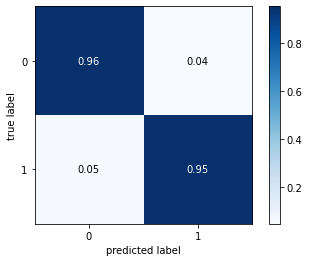

In [20]:
#Predictions on testing data

y_pred = predictor.predict(X_test)
perf = predictor.evaluate_predictions(y_true=y_test.squeeze(), y_pred=y_pred, auxiliary_metrics=True)
print(classification_report(y_test.squeeze(), y_pred))

cm = confusion_matrix(y_test.squeeze(), y_pred)

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   show_absolute = False,
                                   show_normed = True,
                                   colorbar = True)

plt.show()

# Experiment 4: MDVR Dataset - Acoustic Features Only


In [21]:
#Splitting the data into training and testing sets

mdvr_acoustic = df_MDVR_X[mdvr_acoustic_feature_names]

X_train, X_test, y_train, y_test = train_test_split(mdvr_acoustic, df_MDVR_Y, test_size = 0.3, random_state = 42)

# Scale
sc = MinMaxScaler()

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

X_train = pd.concat([X_train, y_train], axis=1, join="inner")
X_test = pd.concat([X_test, y_test], axis=1, join="inner")

X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))

In [22]:
#fitting models to training data

predictor = TabularPredictor(label=11, path=None).fit(X_train, num_bag_folds=6, num_bag_sets=10)
predictor.leaderboard(data = X_train, extra_metrics=eval_metrics, extra_info=False)

No path specified. Models will be saved in: "AutogluonModels/ag-20220419_163017/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220419_163017/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    565
Train Data Columns: 11
Label Column: 11
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0.0, 1.0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11552.44 MB
	Train Data (Original)  Memory Usage: 0.05 MB (0.0% of available memory)
	Inferring data type of each featu

                      model  score_test  accuracy        f1  precision    recall  score_val  pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     KNeighborsDist_BAG_L1    1.000000  1.000000  1.000000   1.000000  1.000000   0.764602        0.104094       0.102127    0.006341                 0.104094                0.102127           0.006341            1       True          2
1   RandomForestEntr_BAG_L1    1.000000  1.000000  1.000000   1.000000  1.000000   0.803540        0.220520       0.142869    1.133922                 0.220520                0.142869           1.133922            1       True          6
2   RandomForestGini_BAG_L1    1.000000  1.000000  1.000000   1.000000  1.000000   0.789381        0.224048       0.153179    1.211672                 0.224048                0.153179           1.211672            1       True          5
3     ExtraTreesEntr_BAG_L1    1.000000  1.00000

,model,score_test,accuracy,f1,precision,recall,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.764602,0.104094,0.102127,0.006341,0.104094,0.102127,0.006341,1,True,2
1,RandomForestEntr_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.803540,0.220520,0.142869,1.133922,0.220520,0.142869,1.133922,1,True,6
2,RandomForestGini_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.789381,0.224048,0.153179,1.211672,0.224048,0.153179,1.211672,1,True,5
3,ExtraTreesEntr_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.794690,0.225932,0.147596,0.846430,0.225932,0.147596,0.846430,1,True,9
4,ExtraTreesGini_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.785841,0.228174,0.140493,0.892923,0.228174,0.140493,0.892923,1,True,8
5,LightGBMLarge_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.798230,1.332569,0.396439,177.594416,1.332569,0.396439,177.594416,1,True,13
6,XGBoost_BAG_L1,0.982301,0.982301,0.979339,0.995798,0.963415,0.791150,0.658214,0.595034,151.704361,0.658214,0.595034,151.704361,1,True,11
7,LightGBM_BAG_L1,0.961062,0.961062,0.954167,0.978632,0.930894,0.805310,0.587222,0.292621,147.600755,0.587222,0.292621,147.600755,1,True,4
8,WeightedEnsemble_L2,0.941593,0.941593,0.929336,0.981900,0.882114,0.831858,4.282554,2.738300,798.307448,0.005162,0.001678,1.215042,2,True,14
9,CatBoost_BAG_L1,0.911504,0.911504,0.890830,0.962264,0.829268,0.821239,0.115564,0.241319,225.272271,0.115564,0.241319,225.272271,1,True,7


In [23]:
X_test = X_test.iloc[:, :-1]

Evaluation: accuracy on test data: 0.7942386831275721
Evaluations on test data:
{
    "accuracy": 0.7942386831275721,
    "balanced_accuracy": 0.7802150537634409,
    "mcc": 0.5628155294356081,
    "f1": 0.7282608695652175,
    "precision": 0.7362637362637363,
    "recall": 0.7204301075268817
}


              precision    recall  f1-score   support

           0       0.83      0.84      0.83       150
           1       0.74      0.72      0.73        93

    accuracy                           0.79       243
   macro avg       0.78      0.78      0.78       243
weighted avg       0.79      0.79      0.79       243



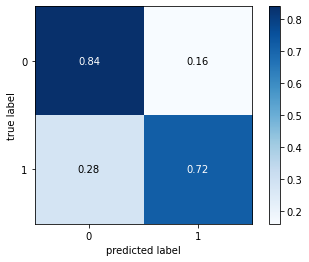

In [24]:
#Predictions on testing data

y_pred = predictor.predict(X_test)
perf = predictor.evaluate_predictions(y_true=y_test.squeeze(), y_pred=y_pred, auxiliary_metrics=True)
print(classification_report(y_test.squeeze(), y_pred))

cm = confusion_matrix(y_test.squeeze(), y_pred)

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   show_absolute = False,
                                   show_normed = True,
                                   colorbar = True)

plt.show()

# Experiment 5: MDVR Dataset - All features

In [25]:
#Splitting the data into training and testing sets

mdvr_all = df_MDVR_X

X_train, X_test, y_train, y_test = train_test_split(mdvr_all, df_MDVR_Y, test_size = 0.3, random_state = 42)

# Scale
sc = MinMaxScaler()

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

X_train = pd.concat([X_train, y_train], axis=1, join="inner")
X_test = pd.concat([X_test, y_test], axis=1, join="inner")

X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))

In [26]:
#fitting models to training data

predictor = TabularPredictor(label=24, path=None).fit(X_train, num_bag_folds=6, num_bag_sets=10)
predictor.leaderboard(data = X_train, extra_metrics=eval_metrics, extra_info=False)

No path specified. Models will be saved in: "AutogluonModels/ag-20220419_165248/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220419_165248/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    565
Train Data Columns: 24
Label Column: 24
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0.0, 1.0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11188.17 MB
	Train Data (Original)  Memory Usage: 0.11 MB (0.0% of available memory)
	Inferring data type of each featu

                      model  score_test  accuracy        f1  precision    recall  score_val  pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     KNeighborsDist_BAG_L1    1.000000  1.000000  1.000000   1.000000  1.000000   0.915044        0.110411       0.110599    0.007013                 0.110411                0.110599           0.007013            1       True          2
1           CatBoost_BAG_L1    1.000000  1.000000  1.000000   1.000000  1.000000   0.902655        0.150394       0.244216  349.101493                 0.150394                0.244216         349.101493            1       True          7
2     ExtraTreesEntr_BAG_L1    1.000000  1.000000  1.000000   1.000000  1.000000   0.879646        0.222479       0.150174    0.846407                 0.222479                0.150174           0.846407            1       True          9
3   RandomForestEntr_BAG_L1    1.000000  1.00000

,model,score_test,accuracy,f1,precision,recall,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.915044,0.110411,0.110599,0.007013,0.110411,0.110599,0.007013,1,True,2
1,CatBoost_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.902655,0.150394,0.244216,349.101493,0.150394,0.244216,349.101493,1,True,7
2,ExtraTreesEntr_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.879646,0.222479,0.150174,0.846407,0.222479,0.150174,0.846407,1,True,9
3,RandomForestEntr_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.870796,0.224486,0.144953,1.180493,0.224486,0.144953,1.180493,1,True,6
4,RandomForestGini_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.870796,0.225704,0.147342,1.095464,0.225704,0.147342,1.095464,1,True,5
5,ExtraTreesGini_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.890265,0.226622,0.138032,0.892040,0.226622,0.138032,0.892040,1,True,8
6,XGBoost_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.879646,0.737135,0.606365,145.633683,0.737135,0.606365,145.633683,1,True,11
7,LightGBM_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.893805,1.064392,0.353238,158.772663,1.064392,0.353238,158.772663,1,True,4
8,LightGBMLarge_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.881416,2.388975,0.516030,219.917464,2.388975,0.516030,219.917464,1,True,13
9,WeightedEnsemble_L2,1.000000,1.000000,1.000000,1.000000,1.000000,0.946903,4.160202,3.623333,470.370173,0.004153,0.002109,1.255051,2,True,14


In [27]:
X_test = X_test.iloc[:, :-1]

Evaluation: accuracy on test data: 0.9218106995884774
Evaluations on test data:
{
    "accuracy": 0.9218106995884774,
    "balanced_accuracy": 0.9264516129032259,
    "mcc": 0.8399960011363071,
    "f1": 0.9025641025641027,
    "precision": 0.8627450980392157,
    "recall": 0.946236559139785
}


              precision    recall  f1-score   support

           0       0.96      0.91      0.93       150
           1       0.86      0.95      0.90        93

    accuracy                           0.92       243
   macro avg       0.91      0.93      0.92       243
weighted avg       0.93      0.92      0.92       243



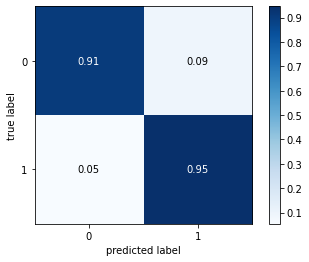

In [28]:
#Predictions on testing data

y_pred = predictor.predict(X_test)
perf = predictor.evaluate_predictions(y_true=y_test.squeeze(), y_pred=y_pred, auxiliary_metrics=True)
print(classification_report(y_test.squeeze(), y_pred))

cm = confusion_matrix(y_test.squeeze(), y_pred)

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   show_absolute = False,
                                   show_normed = True,
                                   colorbar = True)

plt.show()

# Experiment 6: MDVR Dataset - Selected Features Only

In [29]:
#Splitting the data into training and testing sets

mdvr_custom = df_MDVR_X[mdvr_selected_feature_names]

X_train, X_test, y_train, y_test = train_test_split(mdvr_custom, df_MDVR_Y, test_size = 0.3, random_state = 42)

# Scale
sc = MinMaxScaler()

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

X_train = pd.concat([X_train, y_train], axis=1, join="inner")
X_test = pd.concat([X_test, y_test], axis=1, join="inner")

X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))


In [30]:
#fitting models to training data

predictor = TabularPredictor(label=10, path=None).fit(X_train, num_bag_folds=6, num_bag_sets=10)
predictor.leaderboard(data = X_train, extra_metrics=eval_metrics, extra_info=False)

No path specified. Models will be saved in: "AutogluonModels/ag-20220419_171831/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220419_171831/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    565
Train Data Columns: 10
Label Column: 10
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0.0, 1.0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11168.93 MB
	Train Data (Original)  Memory Usage: 0.05 MB (0.0% of available memory)
	Inferring data type of each featu

                      model  score_test  accuracy        f1  precision    recall  score_val  pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     KNeighborsDist_BAG_L1    1.000000  1.000000  1.000000   1.000000  1.000000   0.849558        0.104174       0.102353    0.006316                 0.104174                0.102353           0.006316            1       True          2
1   RandomForestGini_BAG_L1    1.000000  1.000000  1.000000   1.000000  1.000000   0.854867        0.219255       0.137501    1.120377                 0.219255                0.137501           1.120377            1       True          5
2   RandomForestEntr_BAG_L1    1.000000  1.000000  1.000000   1.000000  1.000000   0.846018        0.222891       0.135496    1.049012                 0.222891                0.135496           1.049012            1       True          6
3     ExtraTreesGini_BAG_L1    1.000000  1.00000

,model,score_test,accuracy,f1,precision,recall,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.849558,0.104174,0.102353,0.006316,0.104174,0.102353,0.006316,1,True,2
1,RandomForestGini_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.854867,0.219255,0.137501,1.120377,0.219255,0.137501,1.120377,1,True,5
2,RandomForestEntr_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.846018,0.222891,0.135496,1.049012,0.222891,0.135496,1.049012,1,True,6
3,ExtraTreesGini_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.861947,0.229420,0.154440,0.847782,0.229420,0.154440,0.847782,1,True,8
4,ExtraTreesEntr_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.865487,0.233971,0.149615,0.857013,0.233971,0.149615,0.857013,1,True,9
5,XGBoost_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.861947,0.764508,0.682317,141.932807,0.764508,0.682317,141.932807,1,True,11
6,LightGBM_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.865487,0.996565,0.412097,154.339200,0.996565,0.412097,154.339200,1,True,4
7,LightGBMLarge_BAG_L1,1.000000,1.000000,1.000000,1.000000,1.000000,0.863717,2.115233,0.537464,203.860538,2.115233,0.537464,203.860538,1,True,13
8,WeightedEnsemble_L2,1.000000,1.000000,1.000000,1.000000,1.000000,0.907965,2.174967,1.654385,331.102262,0.006431,0.002975,1.445040,2,True,14
9,CatBoost_BAG_L1,0.992920,0.992920,0.991837,0.995902,0.987805,0.865487,0.160211,0.188723,240.529395,0.160211,0.188723,240.529395,1,True,7


In [31]:
X_test = X_test.iloc[:, :-1]

Evaluation: accuracy on test data: 0.8600823045267489
Evaluations on test data:
{
    "accuracy": 0.8600823045267489,
    "balanced_accuracy": 0.8498924731182795,
    "mcc": 0.7027635198708629,
    "f1": 0.8152173913043477,
    "precision": 0.8241758241758241,
    "recall": 0.8064516129032258
}


              precision    recall  f1-score   support

           0       0.88      0.89      0.89       150
           1       0.82      0.81      0.82        93

    accuracy                           0.86       243
   macro avg       0.85      0.85      0.85       243
weighted avg       0.86      0.86      0.86       243



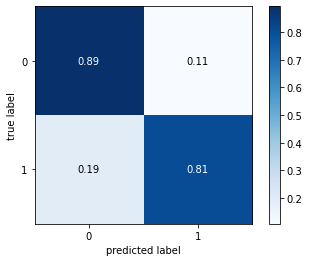

In [32]:
#Predictions on testing data

y_pred = predictor.predict(X_test)
perf = predictor.evaluate_predictions(y_true=y_test.squeeze(), y_pred=y_pred, auxiliary_metrics=True)

print(classification_report(y_test.squeeze(), y_pred))

cm = confusion_matrix(y_test.squeeze(), y_pred)

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   show_absolute = False,
                                   show_normed = True,
                                   colorbar = True)

plt.show()

# Example Testing Methods From Original Paper

In [33]:
#k-fold evaluation

df_kfold = df_italian
df_Xnew = df_kfold.iloc[:, :-1].values
df_Ynew = df_kfold.iloc[:,-1].values


X_kfold = pd.DataFrame(df_Xnew)
y_kfold = pd.DataFrame(df_Ynew)

parts = 6
kfold = KFold(n_splits=parts, shuffle=True, random_state=None) 

# splits into 5 groups 
print("Divided into %s parts." %parts)

k_list = []

all_report_values = []

for i in range (1,11):
    row = []
    current_fold_reports = []
    row.append(i)
    total = 0
    
    for train, test in kfold.split(X_kfold,y_kfold):
        #print('\ntrain: %s, test: %s' % (train, test))
        Xtrain_kfold = X_kfold.iloc[train, :]
        Ytrain_kfold = y_kfold.iloc[train, :]
        Xtest_kfold = X_kfold.iloc[test, :]
        Ytest_kfold = y_kfold.iloc[test, :]
        #print(Xtest_kfold)
        #print(Ytest_kfold)
        #print(Ytrain_kfold)

        Xtrain_kfold = sc.fit_transform(Xtrain_kfold)
        Xtest_kfold = sc.transform(Xtest_kfold)

        #modelling
        model_knn_new = KNeighborsClassifier(n_neighbors = 1, p =2, leaf_size = 1)
        model_knn_new.fit(Xtrain_kfold, Ytrain_kfold)
        y_pred_knn_new = model_knn_new.predict(Xtest_kfold)

        conf_matrix_knn_kfold = confusion_matrix(Ytest_kfold, y_pred_knn_new)
        fold_report = classification_report(Ytest_kfold, y_pred_knn_new, output_dict=True)

        current_fold_reports.append(fold_report)

        accuracy_knn_kfold = ((conf_matrix_knn_kfold[0,0] + conf_matrix_knn_kfold[1,1])/(conf_matrix_knn_kfold[0,0] +conf_matrix_knn_kfold[0,1]+conf_matrix_knn_kfold[1,0]+conf_matrix_knn_kfold[1,1]))*100

        #print("Confusion Matrix:\n ", conf_matrix_knn_kfold)
        #print("Accuracy ", accuracy_knn_kfold)

        row.append(accuracy_knn_kfold)
        total += accuracy_knn_kfold

    average = row.append(total/parts)
        
    #print(row)
    k_list.append(row)

print("KNN K-fold Evaluation with optimal parameters")
print(all_report_values)
k_list = pd.DataFrame(k_list, columns=['Loops','fold 1','fold 2','fold 3','fold 4','fold 5','fold 6' ,'mean accuracy'])
k_list

Divided into 6 parts.


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

KNN K-fold Evaluation with optimal parameters
[]


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,Loops,fold 1,fold 2,fold 3,fold 4,fold 5,fold 6,mean accuracy
0,1,90.361446,91.566265,95.180723,97.560976,91.463415,95.121951,93.542463
1,2,89.156627,92.771084,95.180723,92.682927,89.024390,97.560976,92.729454
2,3,93.975904,97.590361,90.361446,95.121951,96.341463,96.341463,94.955431
3,4,97.590361,90.361446,96.385542,93.902439,91.463415,96.341463,94.340778
4,5,96.385542,89.156627,98.795181,95.121951,93.902439,95.121951,94.747282
5,6,93.975904,85.542169,96.385542,87.804878,98.780488,96.341463,93.138407
6,7,97.590361,96.385542,95.180723,92.682927,93.902439,92.682927,94.737487
7,8,92.771084,93.975904,87.951807,90.243902,95.121951,95.121951,92.531100
8,9,93.975904,93.975904,92.771084,96.341463,97.560976,84.146341,93.128612
9,10,98.795181,97.590361,93.975904,87.804878,92.682927,96.341463,94.531786
